## Introduction
There are different types of possible splicing sites including (1) 5’ and 3’ splicing cites. These are signals marking the beginning and end of introns. Mutation in these regions can disrupt the splicing process. 
(2) Branch points. Branch points are specific sequences within introns that play a crucial role in the splicing process. (3). Splicing regulatory elements, i.e. exonic/intronic splicing enhancers/silencers. These elements include exonic and intronic splicing enhancers (ESEs and ISEs) and exonic and intronic splicing silencers (ESSs and ISSs).
Enhancers are sequences that promote splicing and are often found in exons and introns. Silencers are sequences that inhibit splicing. 

Single nucleotide variants (SNVs) are the most commonly observed genetic variants in the human genome. These SNVs represent a substantial portion of genetic variation and have the potential to influence splicing. 
Single Nucleotide Variants (SNVs) are the most common type of genetic variation observed in the human genome.
SNVs may occur at canonical splice sites, affecting the recognition of 5' and 3' splice sites by the splicing machinery. This can result in aberrant splicing patterns and the inclusion of intronic sequences in the mature mRNA.
SNVs can create or disrupt splicing enhancers or silencers, affecting the binding of regulatory proteins that control splicing. This alteration in splicing regulatory elements can lead to changes in exon inclusion or exclusion.
SNVs within introns can potentially affect the branch point sequence, impacting the efficiency of the splicing process.

We collect these variants from the healthy cohort
dataset of the Genotype-Tissue Expression project  (GTEx). This dataset consisted of 7,842
RNA-seq samples from 48 tissues of 543 healthy donors.
The data can be downloaded using the Hail API https://hail.is/docs/0.2/datasets.html.

The Genome Aggregation Database (gnomAD) is a comprehensive resource that provides information on genetic variants observed in diverse human populations. GnomAD aggregates data from various large-scale sequencing projects to create a broad picture of genetic variation in different populations. GnomAD includes genetic variants from diverse populations.

GnomAD provides allele frequencies for each variant in different populations. These frequencies indicate the prevalence of a variant within a specific population.

In [73]:
import pandas as pd

gtex_df = pd.read_csv("ALTssDB_5ss.csv")

gtex_df.head(10)

,chromo,strand,start,end,genename,Major_Exon_Size,count,alt5,constitLevel,alt5usageLevel,...,5.ss.Alt.Seq,ALTMaxENT,?MaxEnt,Upstream_intronSize,Downstream_intronSize,Upperstream_intron_gcpct,Exon_gcpct,Downstream_intron_gcpct,Alt5Exon_gcpct,Alt5Downstream_intron_gcpct
0,chr16,-,20627188,20627316,ACSM1,128,5,5,0.5,0.5,...,GAGGTAAGA,10.06,-3.20,9422,1666,0.446667,0.479675,0.493333,0.500000,0.493333
1,chr19,-,45777326,45777590,DMPK,264,12,12,0.5,0.5,...,ATGGTGAGC,8.27,-1.68,76,2292,0.671875,0.640927,0.620000,0.635246,0.600000
2,chr22,-,31937915,31938115,C22orf24,200,5,5,0.5,0.5,...,AAGGTAATG,8.99,-0.31,7117,3466,0.560000,0.471795,0.466667,0.459016,0.473333
3,chr1,-,30950126,30950261,PUM1,135,22,22,0.5,0.5,...,CAGGTAATT,8.55,-0.01,1972,4643,0.366667,0.500000,0.480000,0.500000,0.380000
4,chr16,-,48111577,48111662,ABCC12,85,5,5,0.5,0.5,...,CTGGTATAA,2.20,0.20,113,70,0.534653,0.487500,0.454545,0.507042,0.452830
5,chr16,-,74675323,74675404,MLKL,81,7,7,0.5,0.5,...,AAGGTGAAG,5.73,0.40,16937,223,0.420000,0.500000,0.486667,0.511111,0.513333
6,chr22,-,38487872,38488115,DDX17,243,7,7,0.5,0.5,...,GGGGTAAGG,8.05,2.40,3940,1432,0.453333,0.516807,0.540000,0.512931,0.386667
7,chr6,-,42362946,42363079,TRERF1,133,11,11,0.5,0.5,...,CAGGTCGCT,0.47,4.70,88097,62197,0.593333,0.492188,0.493333,0.512821,0.473333
8,chr7,-,150959571,150959736,KCNH2,165,6,6,0.5,0.5,...,ATGGTGGGG,2.63,8.23,14974,1069,0.673333,0.606250,0.600000,0.525253,0.620000
9,chr4,+,20488818,20488982,SLIT2,164,5,5,0.5,0.5,...,AGAGTGATG,-6.92,15.29,2547,1820,0.266667,0.540881,0.366667,0.534091,0.360000


### Distribution of intron sizes

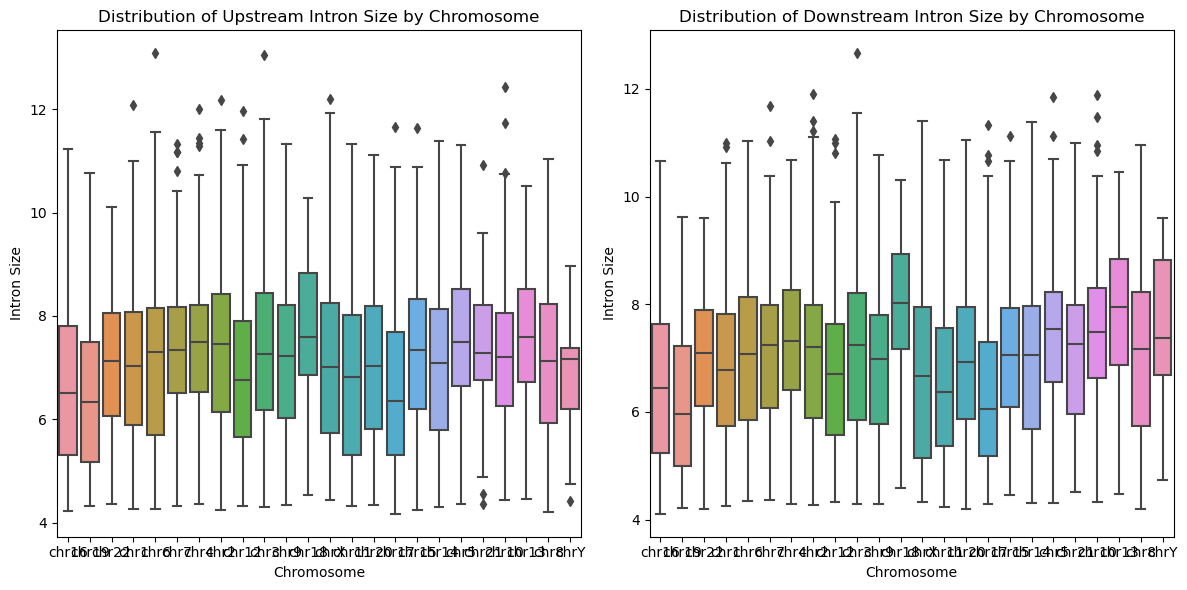

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Chromosome': gtex_df['chromo'].values,
    'Upstream_intronSize': np.log(gtex_df['Upstream_intronSize'].values),
    'Downstream_intronSize': np.log(gtex_df['Downstream_intronSize'].values)
}

df = pd.DataFrame(data)


# Create a boxplot using seaborn
#plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(x='Chromosome', y='Upstream_intronSize', data=df, whis=1.5, ax=axes[0])
axes[0].set_title('Distribution of Upstream Intron Size by Chromosome')
axes[0].set_xlabel('Chromosome')
axes[0].set_ylabel('Intron Size')

sns.boxplot(x='Chromosome', y='Downstream_intronSize', data=df, whis=1.5, ax=axes[1])
axes[1].set_title('Distribution of Downstream Intron Size by Chromosome')
axes[1].set_xlabel('Chromosome')
axes[1].set_ylabel('Intron Size')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Merge with gnomAD population variants dataset

In [75]:
import os

# Replace 'your_folder_path' with the actual path to your folder
folder_path = 'chr'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and append its content to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    #break

# Concatenate all DataFrames in the list into a single DataFrame
gnom_df = pd.concat(dfs, ignore_index=True)

print(gnom_df.shape)

gnom_df.head(10)

(66056, 66)


,Unnamed: 0,chromo,strand,start,end,genename,Major_Exon_Size,count,alt5,constitLevel,...,Allele Frequency South Asian,Allele Count Remaining,Allele Number Remaining,Allele Frequency Remaining,Allele Count African/African American,Allele Number African/African American,Allele Frequency African/African American,Allele Count Middle Eastern,Allele Number Middle Eastern,Allele Frequency Middle Eastern
0,0,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2092,0.000000,0,41452,0.000000,0.0,316.0,0.0
1,1,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2090,0.000000,1,41464,0.000024,0.0,316.0,0.0
2,2,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2092,0.000000,28,41454,0.000675,0.0,316.0,0.0
3,3,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,1,2088,0.000479,1,41456,0.000024,0.0,316.0,0.0
4,4,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2114,0.000000,0,41578,0.000000,0.0,294.0,0.0
5,5,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2112,0.000000,1,41590,0.000024,0.0,294.0,0.0
6,6,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2094,0.000000,1,41466,0.000024,0.0,316.0,0.0
7,7,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2092,0.000000,1,41448,0.000024,0.0,316.0,0.0
8,8,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2090,0.000000,0,41456,0.000000,0.0,316.0,0.0
9,9,chr10,-,814741,814850,LARP4B,109,23,1,0.958,...,0.0,0,2110,0.000000,0,41568,0.000000,0.0,294.0,0.0


In [76]:
gnom_df.columns

Index(['Unnamed: 0', 'chromo', 'strand', 'start', 'end', 'genename',
       'Major_Exon_Size', 'count', 'alt5', 'constitLevel', 'alt5usageLevel',
       'alt5singleCount', 'alt5singleLoc', 'Alt_Exon_Size', '5.ss.Con',
       '5.ss.Seq', 'MaxENT', '5.ss.Alt', '5.ss.Alt.Seq', 'ALTMaxENT',
       '?MaxEnt', 'Upstream_intronSize', 'Downstream_intronSize',
       'Upperstream_intron_gcpct', 'Exon_gcpct', 'Downstream_intron_gcpct',
       'Alt5Exon_gcpct', 'Alt5Downstream_intron_gcpct', 'Chromosome',
       'Position', 'rsIDs', 'Reference', 'Alternate', 'Allele Count',
       'Allele Number', 'Allele Frequency', 'Allele Count Amish',
       'Allele Number Amish', 'Allele Frequency Amish',
       'Allele Count Admixed American', 'Allele Number Admixed American',
       'Allele Frequency Admixed American', 'Allele Count Ashkenazi Jewish',
       'Allele Number Ashkenazi Jewish', 'Allele Frequency Ashkenazi Jewish',
       'Allele Count East Asian', 'Allele Number East Asian',
       'Allele Fr

In [77]:
merged_df = gnom_df

### Compute Allele frequency for difference races

In [78]:
merged_df.shape

(66056, 66)

In [70]:
merged_df['Allele Frequency Admixed American']  = merged_df['Allele Count Admixed American'] / merged_df['Allele Number Admixed American']

merged_df['Allele Frequency African/African American']  = merged_df['Allele Count African/African American'] / merged_df['Allele Number African/African American']

merged_df['Allele Frequency Ashkenazi Jewish']  = merged_df['Allele Count Ashkenazi Jewish'] / merged_df['Allele Number Ashkenazi Jewish']

merged_df['Allele Frequency East Asian']  = merged_df['Allele Count East Asian'] / merged_df['Allele Number East Asian']

merged_df['Allele Frequency Middle Eastern']  = merged_df['Allele Count Middle Eastern'] / merged_df['Allele Number Middle Eastern']

merged_df['Allele Frequency Amish']  = merged_df['Allele Count Amish'] / merged_df['Allele Number Amish']

merged_df['Allele Frequency South Asian']  = merged_df['Allele Count South Asian'] / merged_df['Allele Number South Asian']

merged_df['Allele Frequency European (Finnish)']  = merged_df['Allele Count European (Finnish)'] / merged_df['Allele Number European (Finnish)']

merged_df['Allele Frequency European (non-Finnish)']  = merged_df['Allele Count European (non-Finnish)'] / merged_df['Allele Number European (non-Finnish)']

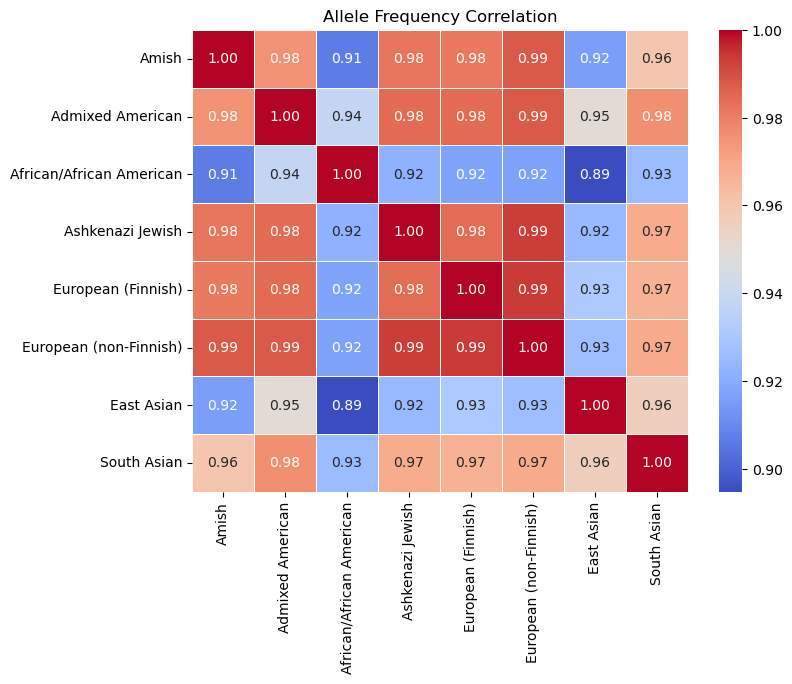

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set labels for the plot
plt.title('Allele Frequency Correlation')
plt.show()


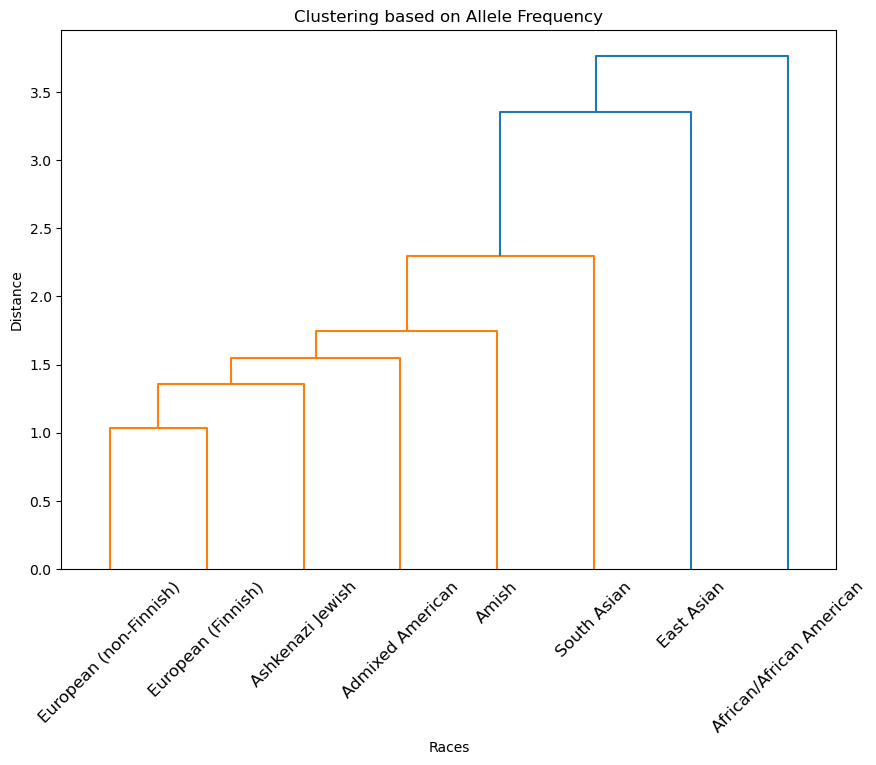

In [80]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Calculate hierarchical clustering
linkage_matrix = linkage(df.transpose(), method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering based on Allele Frequency')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()


#### It is natural to ask what are the differential genes that make the allele frequency of variants outstanding in certain races. From the chart below we see the gene FAM3B makes Amish different from other races.

C:\ProgramData\Anaconda3\envs\untl_py3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 900x600 with 0 Axes>

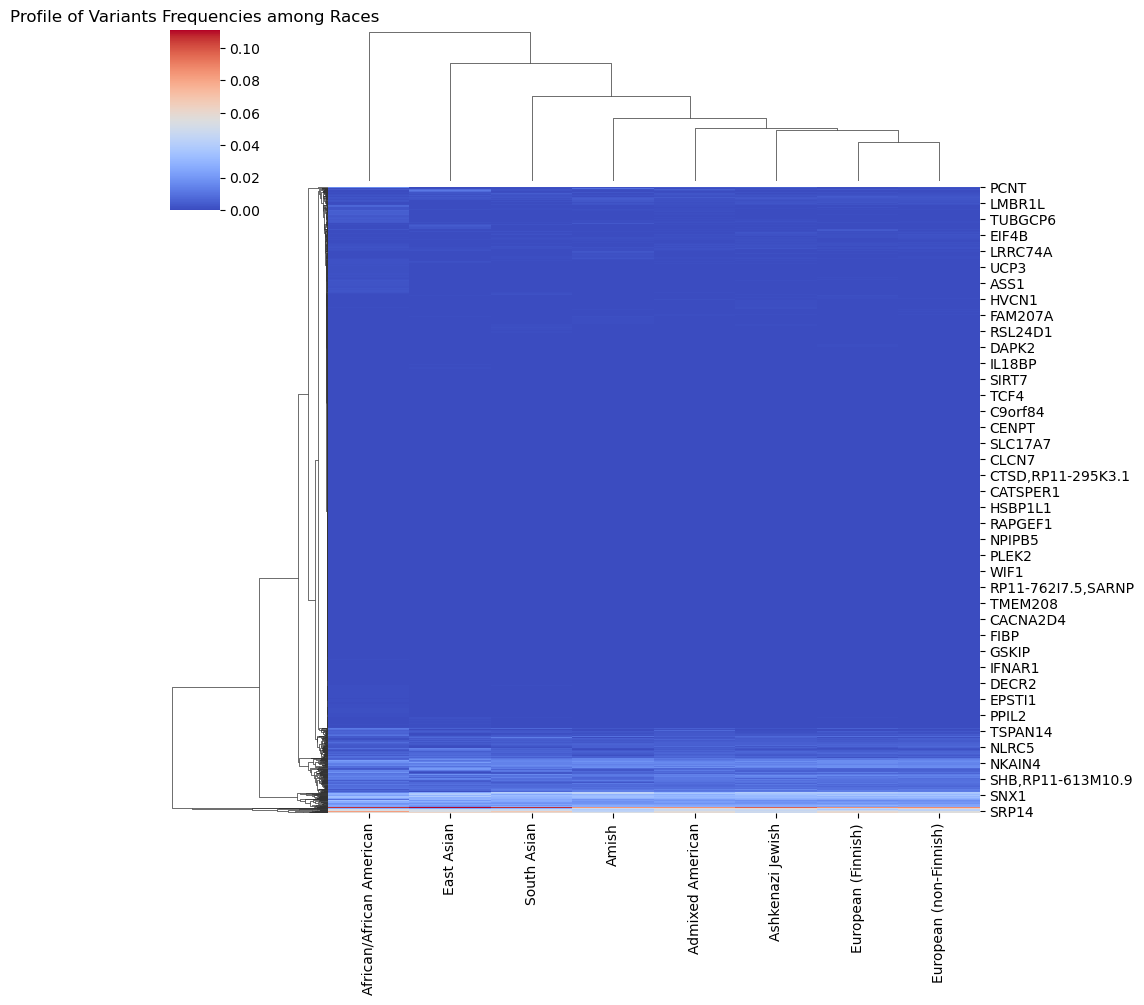

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = merged_df['genename'].unique()

# Example DataFrame creation
data = {
    x: [merged_df[merged_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)

# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()